In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2012-01-01'
end = '2024-12-31'

stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\harnanda\AppData\Local\Temp\ipykernel_4648\981000899.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [6]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
2012-01-09,15.411778,16.019377,15.381324,16.006995,233776981
...,...,...,...,...,...
2024-12-23,195.531952,196.030783,191.182141,193.576526,15235900
2024-12-24,197.108246,197.208003,194.741780,195.711509,6809800


In [7]:
data.reset_index(inplace=True)

In [8]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411778,16.019377,15.381324,16.006995,233776981
...,...,...,...,...,...,...
3264,2024-12-23,195.531952,196.030783,191.182141,193.576526,15235900
3265,2024-12-24,197.108246,197.208003,194.741780,195.711509,6809800
3266,2024-12-26,196.639343,197.696863,195.412207,196.280184,7907900


In [10]:
# moving average
ma_100_days = data.Close.rolling(100).mean()

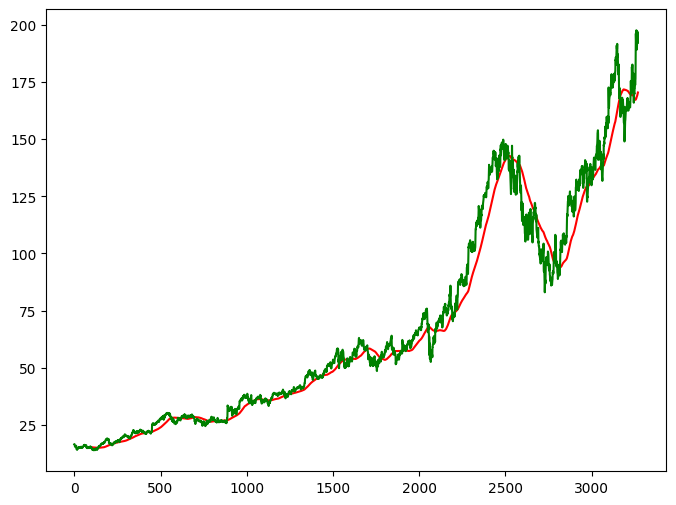

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

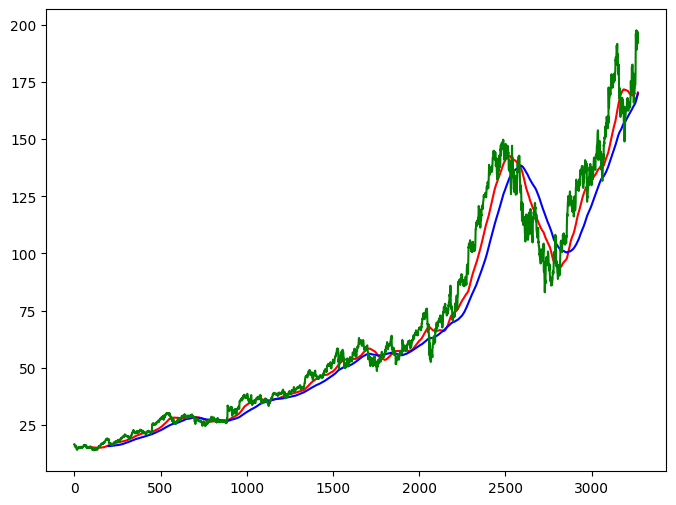

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [15]:
# delete null values
data.dropna(inplace=True)

In [21]:
# distribute data - 80% training data and 20% test data

data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test  = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [23]:
data_train.shape[0], data_test.shape[0]

(2615, 654)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_train_scale = scaler.fit_transform(data_train)
data_train_scale

array([[0.01936668],
       [0.01988927],
       [0.01820132],
       ...,
       [0.70783708],
       [0.69736439],
       [0.71457017]], shape=(2615, 1))

In [30]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i,0])

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
x, y = np.array(x), np.array(y)

In [37]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1], 1)) ))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [39]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 284ms/step - loss: 0.0505
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - loss: 0.0060
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 289ms/step - loss: 0.0055
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 274ms/step - loss: 0.0044
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 281ms/step - loss: 0.0041
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - loss: 0.0048
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - loss: 0.0034
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - loss: 0.0035
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - loss: 0.0036
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 280ms/step - loss: 0.0028
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 347ms/step - loss: 0.0032
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 238ms/step - loss: 0.0030
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - loss: 0.0027
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step - loss: 0.0033
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [42]:
past_100_days = data_train.tail(100)

In [43]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [44]:
data_test_scale = scaler.fit_transform(data_test)

In [50]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100: i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [51]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step


In [52]:
y_predict = scaler.inverse_transform(y_predict)
y = scaler.inverse_transform(y.reshape(-1, 1))

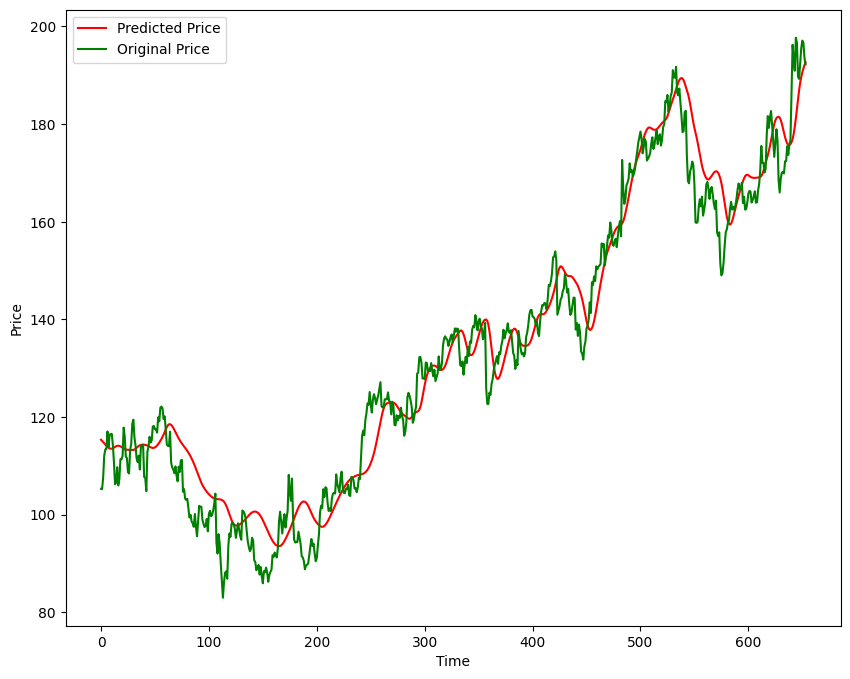

In [57]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r' , label = 'Predicted Price')
plt.plot(y, 'g' , label = 'Original Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [60]:
model.save('Stock Prediction Model.keras')